<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-proditorIF/blob/main/Nov3-4/perceptr%C3%B3n_Nred_McLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Perceptrón:
Se trata de la unidad de procesamiento más básica en el Machine Learning. Su proceso implica combinar linealmente **n** señales de entrada **$x_i$** multiplicando cada una de ellas por un peso sináptico **$w_i$**, lo que produce una entrada ponderada **z**. Esta entrada ponderada pasa a través de una función de activación que tiene establecido un umbral  **$\theta$**. Si el valor de la entrada ponderada supera ese umbral, la función de activación devuelve un uno; de lo contrario, la neurona no se activa y retorna un cero.\
*   $x_i$ : Representan las entradas iniciales del sistema
*   $w_i$ : Representa el peso sináptico correspondiente a cada entrada.
*   $z=w_1x_1\cdots w_nx_n$   : Representa la suma ponderada.\

La función de activación recibe el valor de z y actua de la siguiente forma
$V(z) = 1\quad si \quad z>\theta$  o  $V(z) = 0\quad si \quad z<\theta$

Se dice que es la unidad de procesamiento más básica, ya que consta de dos capas y utiliza únicamente una neurona. La primera capa es la capa de entrada, que recibe las entradas iniciales del sistema y las multiplica linealmente por sus pesos, generando así una entrada ponderada. Esta entrada ponderada se envía a la segunda capa, que es la capa de salida. En esta capa, la entrada ponderada se evalúa en una función de activación, generando una salida binaria de 0 o 1 según el resultado de la evaluación.\
Este tipo de red se aplica en problemas de clasificación binaria y en problemas simples que sean linealmente separables.


In [ ]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

In [ ]:
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
files = glob.glob('/content/drive/MyDrive/Machine_Learn/CATS_DOGS/*')
len(files)

1787

#### Generación del conjunto de entrenamiento y prueba
En ambos casos se aplican ciclos intercalados para obtener un muestreo más variado y tener una distribución mas equilibrda entre conjunto de entrenamiento y conjunto de prueba

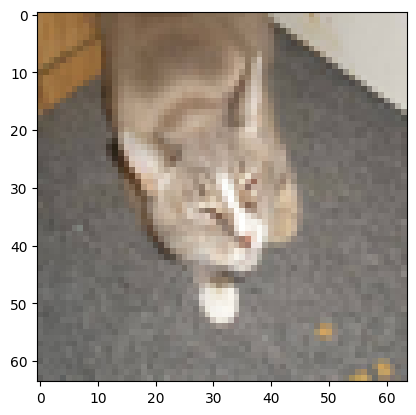

In [ ]:
# Número de píxeles para nuestras imágenes.
num_px = 64
train_x = []
train_y = []
# Cargando y preprocesando las imágenes de entrenamiento
# Se aplican ciclos intercalados para obtener un muestreo mas variado y un aprendizaje mas equlibrado
for file in files[:100]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
for file in files[200:300]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
for file in files[400:500]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
for file in files[600:700]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
for file in files[800:900]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
for file in files[1000:1100]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
for file in files[1200:1300]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
for file in files[1400:1500]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
for file in files[1600:]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)

train_y = np.asarray(train_y)
train_x = np.asarray(train_x)

plt.imshow(train_x[68])

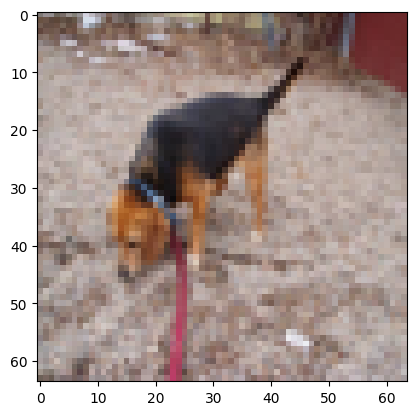

In [ ]:
test_x = []
test_y = []
# Cargando y preprocesando las imágenes de prueba
for file in files[100:200]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
for file in files[300:400]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
for file in files[500:600]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
for file in files[700:800]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
for file in files[900:1000]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
for file in files[1100:1200]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
for file in files[1300:1400]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
for file in files[1500:1600]:
    img = Image.open(file)
    img = img.resize((num_px, num_px))
    data = np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)

test_y = np.asarray(test_y)
test_x = np.asarray(test_x)

plt.imshow(test_x[65])

#### Proceso
- En nuestros caso el vactor de netrda es un vector genrado a travez del tratamiento de cada imagen, es un vector de pixeles.
- Por tanto es requerido un peso para cada pixel, es decir el peso correspondiente a una imagen $x_i$ sera un vector de pesos con un peso para cada pixel de esa imagen $x_i$.
- b en este caso es un sesgo tambien conocido como bias.\

Con estos elementos construimos la entrda ponderda $z = W^Tx+b$

La función de activación sera la sigmoide la cual se evaluara en z
$$σ(z)=\frac{1}{1+e^{-z}}$$

In [ ]:
# Aplanando las imágenes
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T
test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

# Normalizando las imágenes
train_set_x = train_x_flatten / 255
test_set_x = test_x_flatten / 255

# Inicializando los parámetros
W = np.zeros((train_set_x.shape[0], 1)) #Es un peso para cada Pixel
b = 0

# Función  de activación
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función para calcular el costo
def compute_cost(A, Y):
    m = Y.shape[0]
    cost = - (1 / m) * (np.dot(Y, np.log(A).T) + np.dot(1 - Y, np.log(1 - A).T)) #Función costo de la regresión logistica
    return cost

#Optimización por gradiente
def optimize(W, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []

    for i in range(num_iterations):
        m = X.shape[1]

        # Calcular la hipótesis
        Z = np.dot(W.T, X) + b
        A = sigmoid(Z)

        # Calcular el costo
        cost = compute_cost(A, Y)

        # Calcular los gradientes
        dW = (1 / m) * (X @ (A - Y).T)
        db = (1 / m) * np.sum(A - Y)

        # Actualizar los parámetros
        W = W - learning_rate * dW
        b = b - learning_rate * db

        # Registrar el costo
        if i % 100 == 0:
            costs.append(cost)

        # Imprimir el costo
        if print_cost and i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return W, b, costs

# Entrenamiento
num_iterations = 4000
learning_rate = 0.003

W, b, costs = optimize(W, b, train_set_x, train_y, num_iterations, learning_rate, print_cost=True)

# Función para realizar predicciones
def predict(W, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))

    # Calcular la hipótesis
    Z = np.dot(W.T, X) + b #Entrada ponderada
    A = sigmoid(Z) #Predicción

    for i in range(A.shape[1]):
        # Se fija el valor umbral
        Y_prediction[0, i] = 1 if A[0, i] >= 0.5 else 0

    return Y_prediction

# Predicciones en el conjunto de entrenamiento y prueba
Y_prediction_train = predict(W, b, train_set_x)
Y_prediction_test = predict(W, b, test_set_x)

# Calcular la precisión
train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - train_y)) * 100
test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - test_y)) * 100

print(f"Precisión en el conjunto de entrenamiento: {train_accuracy}%")
print(f"Precisión en el conjunto de prueba: {test_accuracy}%")


Cost after iteration 0: [0.69314718]
Cost after iteration 100: [0.63828519]
Cost after iteration 200: [0.61756356]
Cost after iteration 300: [0.60252135]
Cost after iteration 400: [0.59018463]
Cost after iteration 500: [0.57951528]
Cost after iteration 600: [0.56999896]
Cost after iteration 700: [0.56134008]
Cost after iteration 800: [0.55335254]
Cost after iteration 900: [0.54591111]
Cost after iteration 1000: [0.53892688]
Cost after iteration 1100: [0.53233402]
Cost after iteration 1200: [0.52608193]
Cost after iteration 1300: [0.52013064]
Cost after iteration 1400: [0.51444776]
Cost after iteration 1500: [0.50900654]
Cost after iteration 1600: [0.50378453]
Cost after iteration 1700: [0.4987626]
Cost after iteration 1800: [0.49392428]
Cost after iteration 1900: [0.48925526]
Cost after iteration 2000: [0.48474297]
Cost after iteration 2100: [0.48037634]
Cost after iteration 2200: [0.47614549]
Cost after iteration 2300: [0.4720416]
Cost after iteration 2400: [0.46805676]
Cost after ite

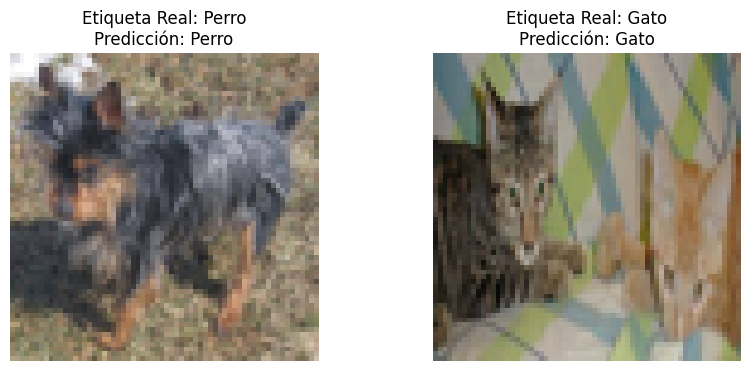

In [ ]:
# Función para mostrar una imagen con la etiqueta real y la predicción
def visualize_prediction(image, actual_label, predicted_label):
    plt.imshow(image)
    plt.axis('off')
    label = "Perro" if actual_label == 1 else "Gato"
    prediction = "Perro" if predicted_label == 1 else "Gato"
    plt.title(f"Etiqueta Real: {label}\nPredicción: {prediction}")

# Elegir un par de imágenes para mostrar
index1 = 154 # Índice de la primera imagen
index2 = 652  # Índice de la segunda imagen

# Realizar predicciones en las imágenes
prediction1 = Y_prediction_test[0, index1]
prediction2 = Y_prediction_test[0, index2]

# Mostrar las imágenes junto con las predicciones
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
visualize_prediction(test_x[index1], test_y[index1], prediction1)

plt.subplot(1, 2, 2)
visualize_prediction(test_x[index2], test_y[index2], prediction2)

plt.show()
